In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


data = pd.read_csv('Collage-data.csv')
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

<Axes: xlabel='room_board', ylabel='grad_rate'>

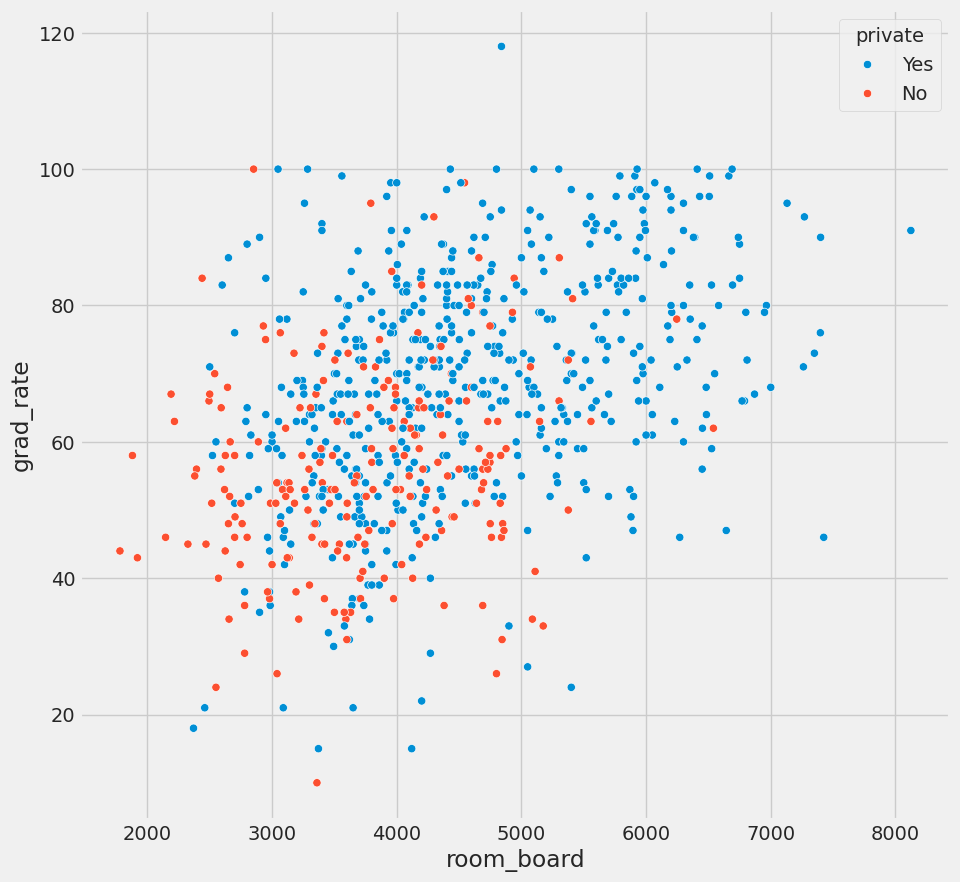

In [ ]:

plt.figure(figsize=(10, 10))
sns.scatterplot(x='room_board', y='grad_rate', data=data, hue='private')

<Axes: xlabel='outstate', ylabel='f_undergrad'>

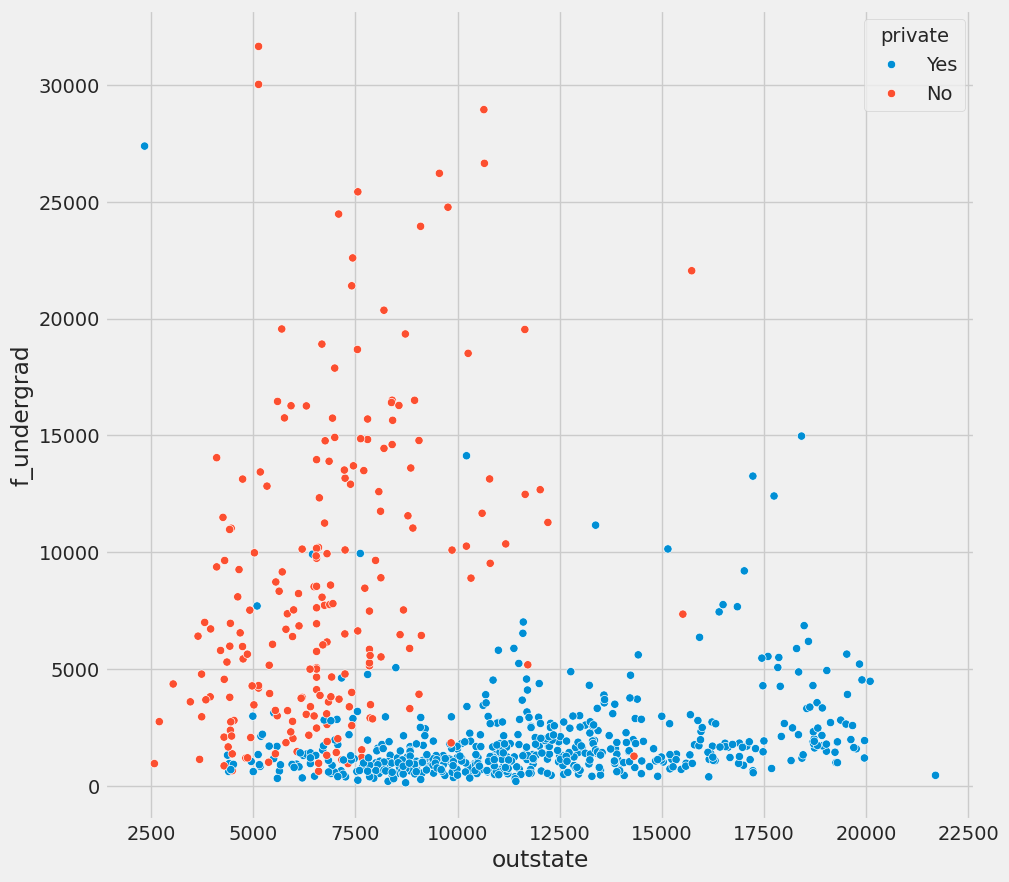

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='outstate', y='f_undergrad', data=data, hue='private')

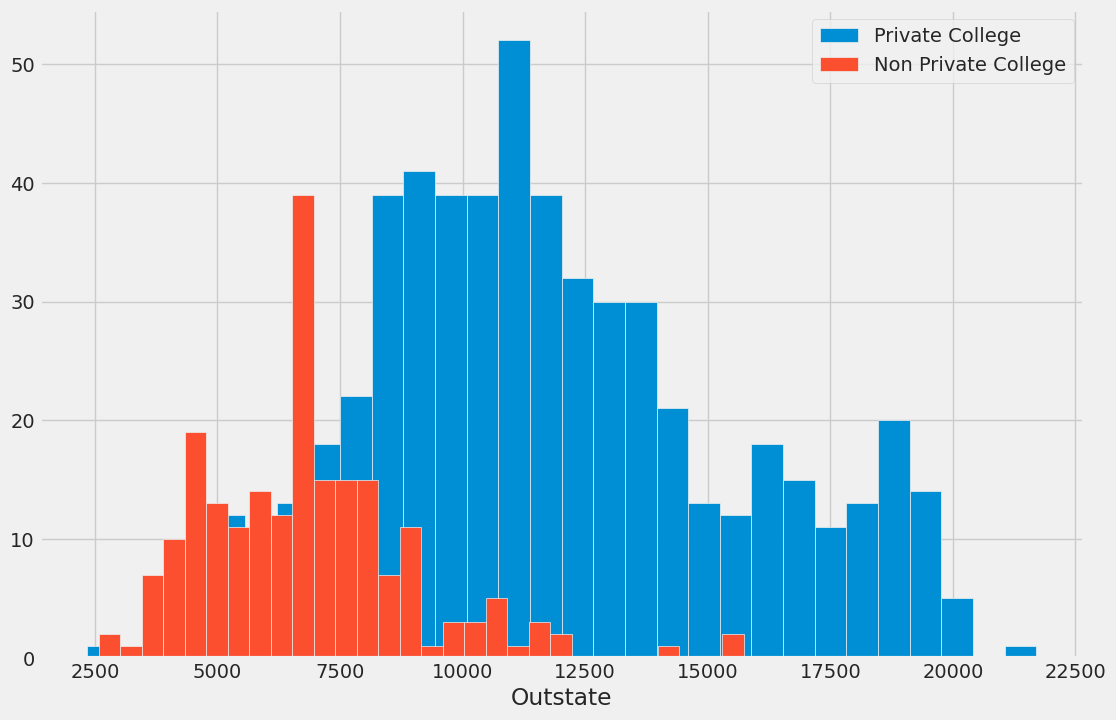

In [ ]:

plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

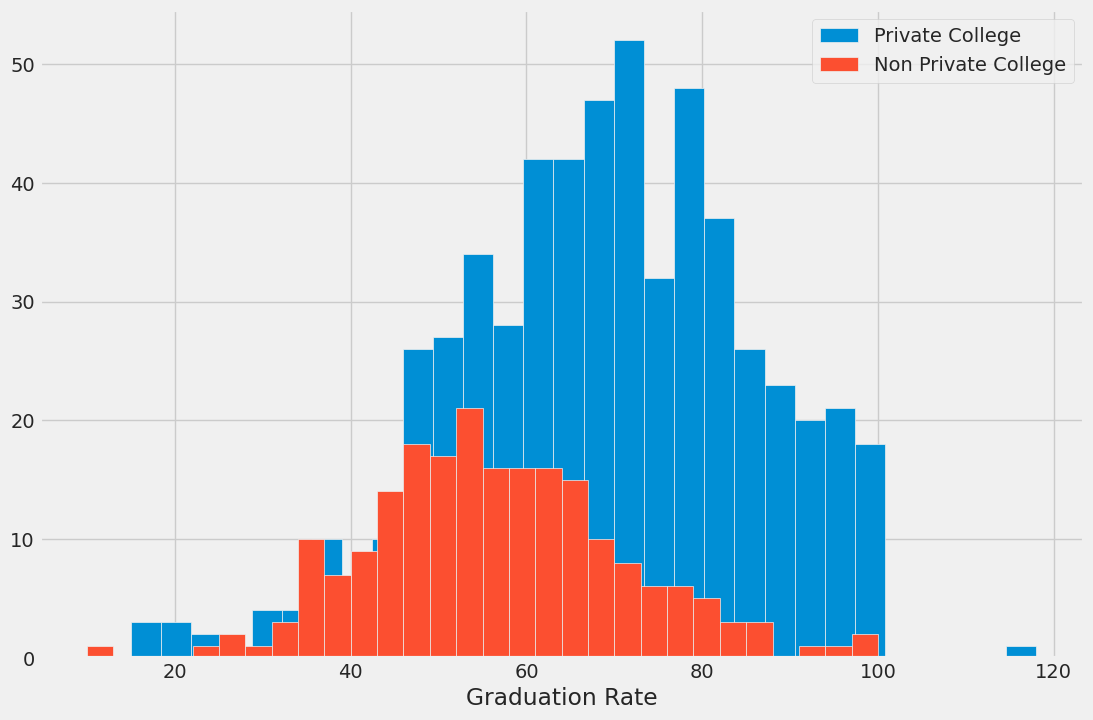

In [ ]:

plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

In [ ]:
data.loc[data.grad_rate > 100]


,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


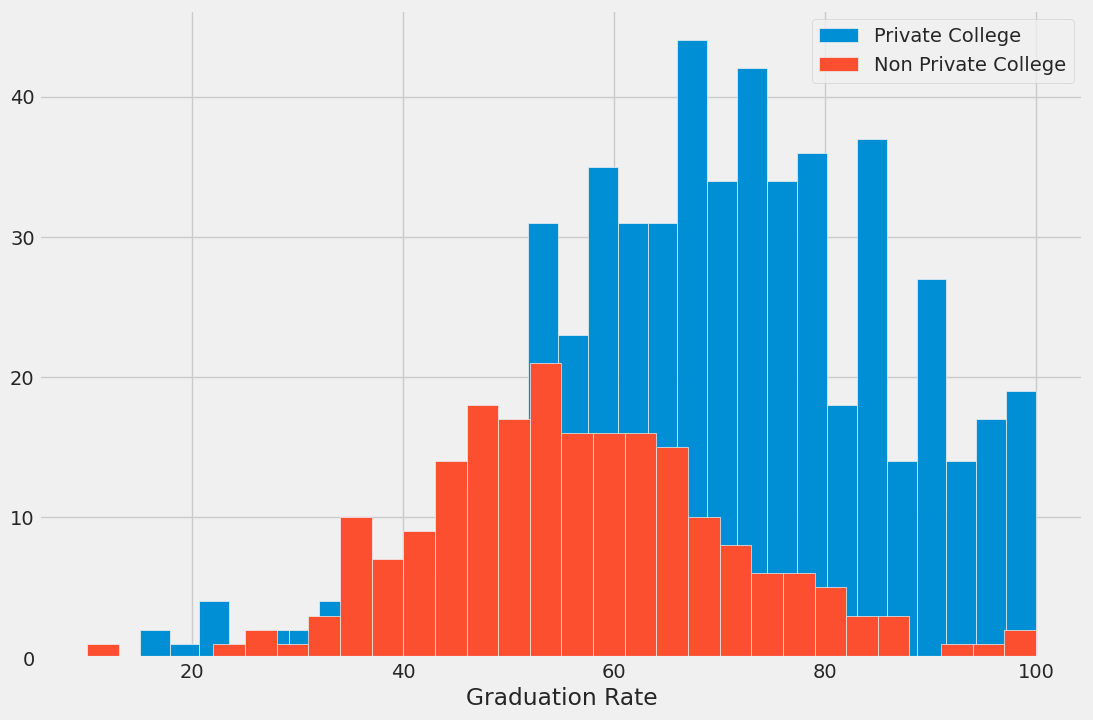

In [ ]:

data.loc[data.grad_rate > 100, 'grad_rate'] = 100
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

In [ ]:
from sklearn.cluster import KMeans

# Create an instance of a K Means model with 2 clusters
kmeans = KMeans(2)

# Fit the model to all the data except for the Private label
kmeans.fit(data.drop('private', axis=1))

KMeans(n_clusters=2)

In [ ]:
KMeans(n_clusters=2)


KMeans(n_clusters=2)

In [ ]:

kmeans.cluster_centers_

array([[1.00549109e+04, 6.73820792e+03, 2.74102970e+03, 3.29702970e+01,
        6.39009901e+01, 1.42840297e+04, 2.94107921e+03, 8.58346535e+03,
        4.21270297e+03, 5.83079208e+02, 1.85466337e+03, 8.35940594e+01,
        8.90990099e+01, 1.61673267e+01, 1.62970297e+01, 9.95570297e+03,
        6.17623762e+01],
       [1.94782101e+03, 1.31368639e+03, 4.86974852e+02, 2.67500000e+01,
        5.45857988e+01, 2.11855178e+03, 5.43665680e+02, 1.07181509e+04,
        4.37916420e+03, 5.44346154e+02, 1.26384320e+03, 7.10266272e+01,
        7.82988166e+01, 1.37792899e+01, 2.37071006e+01, 9.61601627e+03,
        6.59896450e+01]])

In [ ]:

data['private'] = data.private.astype("category").cat.codes

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data.private, kmeans.labels_))
print(classification_report(data.private, kmeans.labels_))

[[ 89 123]
 [ 12 553]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57       212
           1       0.82      0.98      0.89       565

    accuracy                           0.83       777
   macro avg       0.85      0.70      0.73       777
weighted avg       0.84      0.83      0.80       777



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(data.private, kmeans.labels_))
print(pd.DataFrame(classification_report(data.private, kmeans.labels_, output_dict=True)))

0.8262548262548263
                    0           1  accuracy   macro avg  weighted avg
precision    0.881188    0.818047  0.826255    0.849618      0.835275
recall       0.419811    0.978761  0.826255    0.699286      0.826255
f1-score     0.568690    0.891217  0.826255    0.729953      0.803217
support    212.000000  565.000000  0.826255  777.000000    777.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('private', axis=1)
y = data.private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[ 0.54154604  0.50609822  0.4162237   0.83453297  0.83979032  0.36567472
   0.06221034  0.76220744  0.61892254  0.20105471 -0.08162123  0.8172959
   0.79741203 -0.39303606  0.51790522  0.70536601  0.60244044]
 [-0.32604422 -0.30470243 -0.25059242 -0.50244047 -0.50560572 -0.2201588
  -0.03745448 -0.45889603 -0.37262966 -0.12104737  0.04914103 -0.49206269
  -0.48009137  0.23663202 -0.31181098 -0.42467397 -0.36270641]]
0.5212355212355212
[[ 66 146]
 [226 339]]
              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777

